In [2]:
import tensorflow as tf

In [3]:

#https://www.tensorflow.org/guide/core/optimizers_core
class GradientDescent(tf.Module):

  def __init__(self, learning_rate=1e-3):
    # Initialize parameters
    self.learning_rate = learning_rate
    self.title = f"Gradient descent optimizer: learning rate={self.learning_rate}"

  def apply_gradients(self, grads, vars):
    # Update variables
    for grad, var in zip(grads, vars):
      var.assign_sub(self.learning_rate*grad)

In [4]:
x = tf.Variable(1/3)
y = tf.Variable(1/3)
z = [x,y]



In [5]:
L_1 = []
L_2 = []
# Choose the optimizer
optim = GradientDescent()
       #optim = tf.keras.optimizers.Adam()
train_loss_record2 = []
epochs = 10000 #
for i in range(0,epochs): 
        with tf.GradientTape(persistent=True) as t: 
                l_1 = x*y
                l_2 = -l_1
                grad1 = t.gradient(l_1 , [x])
                grad2 = t.gradient(l_2 ,[y])
                # tf.print(grad1)
                # tf.print(grad2)
                optim.apply_gradients(grad1, [x])
                optim.apply_gradients(grad2,[y])
                L_1.append(l_1)
                L_2.append(l_2)

In [8]:
import matplotlib.pyplot as plt

In [9]:
import numpy as np

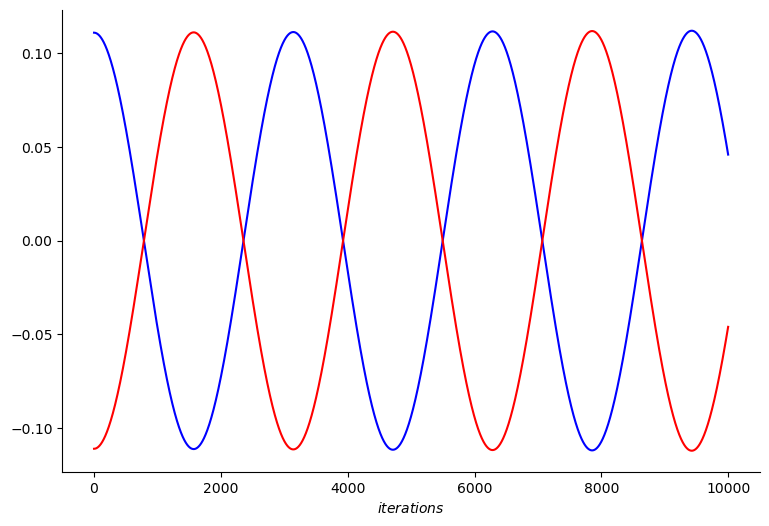

In [29]:
#plt.plot()
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
ax.plot(range(len(L_1)), L_1,'b-')
ax.set_xlabel('${iterations} $')
ax.plot(range(len(L_2)), L_2,'r')
#ax.plot(range(len(L_2)),np.zeros(len(L_2)),"k")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


$$J = \begin{bmatrix}
 \partial_{1 }\partial_{1 }L &  \partial_{1}\partial_{2}L \\
 \partial_{2 }\partial_{1 }-L &  \partial_{2}\partial_{2}-L 
\end{bmatrix} 
\medskip
R = \begin{bmatrix}
 \partial_{1 }\partial_{1 }L &   0 \\
0&  \partial_{2}\partial_{2}-L 

 \end{bmatrix} 
 A =\begin{bmatrix}
  0&  \partial_{1}\partial_{2}L \\
 \partial_{2 }\partial_{1 }-L & 0

\end{bmatrix} $$

$$J(w) = \begin{bmatrix}
 \partial_{\theta_1 }\partial_{\theta_1 }L_1 &  \partial_{\theta_1}\partial_{\theta_2}L_1 \\
 \partial_{\theta_2 }\partial_{\theta_1 }L_2 &  \partial_{\theta_2}\partial_{\theta_2}L_2 

\end{bmatrix} = \begin{bmatrix} 0 & 1\\ -1 & 0 \end{bmatrix}$$

In [20]:
help(ax.set_axis_off)

Help on method set_axis_off in module matplotlib.axes._base:

set_axis_off() method of matplotlib.axes._subplots.AxesSubplot instance
    Turn the x- and y-axis off.
    
    This affects the axis lines, ticks, ticklabels, grid and axis labels.



$grad_x L = y\\ $
$x_{k+1} = x_k - \gamma y_k$

$L_1 = xy~ \\ L_2 = - xy\\$  Gradientdescent

In [12]:

# Choose the optimizer
optim = GradientDescent()
       #optim = tf.keras.optimizers.Adam()
train_loss_record2 = []
epochs = 100 #
for i in range(0,epochs): 
        with tf.GradientTape(persistent=True) as t: 
                l_1 = x*y
                l_2 = -l_1
                grad1 = t.gradient(l_1 , z)
                grad2 = t.gradient(l_2 ,z)
                tf.print(grad1)
                tf.print(grad2)
                optim.apply_gradients(grad1, z)
                optim.apply_gradients(grad2, z)

[0.329768121, 0.329768121]
[-0.329768121, -0.329768121]
[0.329768121, 0.329768121]
[-0.329768121, -0.329768121]
[0.329768121, 0.329768121]
[-0.329768121, -0.329768121]
[0.329768121, 0.329768121]
[-0.329768121, -0.329768121]
[0.329768121, 0.329768121]
[-0.329768121, -0.329768121]
[0.329768121, 0.329768121]
[-0.329768121, -0.329768121]
[0.329768121, 0.329768121]
[-0.329768121, -0.329768121]
[0.329768121, 0.329768121]
[-0.329768121, -0.329768121]
[0.329768121, 0.329768121]
[-0.329768121, -0.329768121]
[0.329768121, 0.329768121]
[-0.329768121, -0.329768121]
[0.329768121, 0.329768121]
[-0.329768121, -0.329768121]
[0.329768121, 0.329768121]
[-0.329768121, -0.329768121]
[0.329768121, 0.329768121]
[-0.329768121, -0.329768121]
[0.329768121, 0.329768121]
[-0.329768121, -0.329768121]
[0.329768121, 0.329768121]
[-0.329768121, -0.329768121]
[0.329768121, 0.329768121]
[-0.329768121, -0.329768121]
[0.329768121, 0.329768121]
[-0.329768121, -0.329768121]
[0.329768121, 0.329768121]
[-0.329768121, -0.329

In [30]:
x = tf.Variable(1/3)
y = tf.Variable(1/3)
z = [x,y]

Gradient descent auf dem Hamiltonian

$\frac{1}{2}((\nabla_x L)^2   + ( \nabla_y L)^2)$

In [29]:

optim = GradientDescent()
train_loss_record2 = []
epochs = 1000
for i in range(0,epochs): 
        with tf.GradientTape() as t: 
                H = (1/2) *   (  x*x + y*y )
                grad1 = t.gradient(H , z)
                train_loss_record2.append(H)
                optim.apply_gradients(grad1, z)


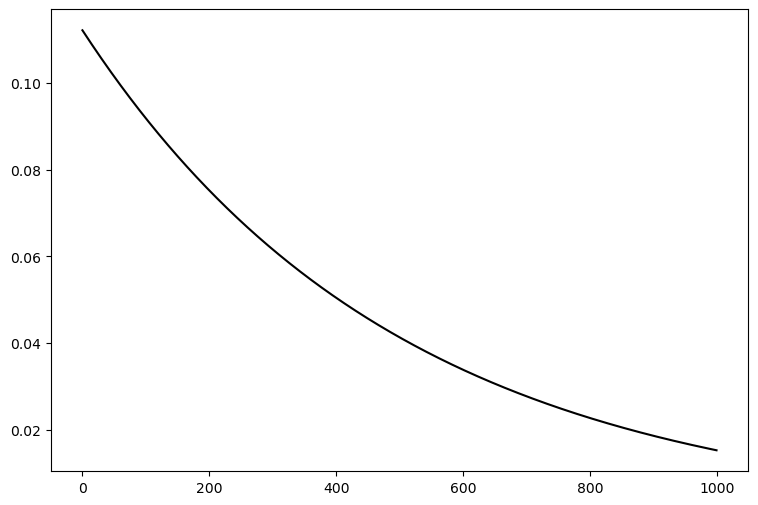

In [33]:
#plt.plot()
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
ax.plot(range(len(train_loss_record2)), train_loss_record2,'k-')


consenus in hamiltonian?


In [ ]:

# optim = GradientDescent()
#        #optim = tf.keras.optimizers.Adam()
# train_loss_record2 = []
# epochs = 100 #
# for i in range(0,epochs): 
#         with tf.GradientTape(persistent=True) as t: 
#                 l_1 = x*y
#                 l_2 = -l_1
#                 grad1 = t.gradient(l_1 , z)
#                 grad2 = t.gradient(l_2 ,z)
#                 tf.print(grad1)
#                 tf.print(grad2)
#                 optim.apply_gradients(grad1, z)
#                 optim.apply_gradients(grad2, z)

In [1]:
import CGDs

In [10]:
D = nn.Linear(1, 1, bias=False).to(device)
G = nn.Linear(1,1, bias=False).to(device)
nn.init.constant_(D.weight, 2.0)
nn.init.constant_(G.weight, 1.0)
#   nn.init.zeros_(self.linears[i].bias.data)
x0 = torch.from_numpy(np.array([1])).to(device).float()
y0 = torch.from_numpy(np.array([1])).to(device).float()
g = G.forward(x0)
h = D.forward(y0)

In [14]:


optimizer2 = CGDs.BCGD(D.parameters(), G.parameters(), lr_max=1.0, lr_min=1.0, tol=1e-10)

# torch.cuda.synchronize()
start = time.time()

for i in range(100):
    z = torch.ones(1, device=device)
    loss = (g*g - h*h)
    optimizer2.step(loss)


# torch.cuda.synchronize()
end = time.time()
print(f'Time cost: {end - start}')


Time cost: 0.32574987411499023


In [15]:
G.weight

Parameter containing:
tensor([[-399.]], requires_grad=True)

In [16]:
D.weight

Parameter containing:
tensor([[2.]], requires_grad=True)

In [18]:

#https://www.tensorflow.org/guide/core/optimizers_core
class GradientDescent(tf.Module):

  def __init__(self, learning_rate=1e-3):
    # Initialize parameters
    self.learning_rate = learning_rate
    self.title = f"Gradient descent optimizer: learning rate={self.learning_rate}"

  def apply_gradients(self, grads, vars):
    # Update variables
    for grad, var in zip(grads, vars):
      var.assign_sub(self.learning_rate*grad)

In [ ]:
def delta_x():
           
    f_x = t.gradient( l_1, x)
    f_x2 = t.gradient(f_x,x)
    f_xy = t.gradient(f_x,y)
    f_y = t.gradient( l_1, y)
    deltax = f_x + f_x2*f_x + f_xy * f_y

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 4)

In [20]:
def f_y(x,y,l_1):
    t.watch(y)
    f_y = t.gradient( l_1, y)
    f_y2 = t.gradient(f_y,y)
    f_yx = t.gradient(f_y,x) 
    f_x = t.gradient( l_1, x)
    #loop?
    # for i in [f_y,f_y2,f_yx,f_x] :
    #     i = i if i is not None else 0
    f_y = f_y if f_y is not None else 0
    f_y2 = f_y2 if f_y2 is not None else 0
    f_yx = f_yx if f_yx is not None else 0
    f_x = f_x if f_x is not None else 0
    deltay = f_y + f_y2*f_y + f_yx * f_x
    y.assign_sub(0.01*deltay)
    return 

In [27]:
x = tf.Variable(1/2)
y = tf.Variable(1/2)

con opt

$\delta x = f_{\nabla x }+ f_{\nabla x2}*f_{\nabla x }+ f_{\nabla xy} * f_{\nabla y}$

In [ ]:
optim = GradientDescent(0.01)
def f_x(x,y,l_1):
    t.watch(x)
    f_x = t.gradient( l_1, x)
    f_x2 = t.gradient(f_x,x)
    f_xy = t.gradient(f_x,y) 
    f_y = t.gradient( l_1, y)
    #loop?
    f_x = f_x if f_x is not None else 0
    f_x2 = f_x2 if f_x2 is not None else 0
    f_xy = f_xy if f_xy is not None else 0
    f_y = f_y if f_y is not None else 0
    deltax = f_x + f_x2*f_x + f_xy * f_y
    x.assign_sub(0.01*deltax)
    return 




for k in range(500):
        with tf.GradientTape(persistent=True) as t: 
                l_1 = 5*( x**2 - y**2)
                f_x(x,y,l_1)
                f_y(x,y,-l_1)

        #optim.apply_gradients(delta_x,x)
        # optim.apply_gradients(zip(grad2, y))


In [29]:
x,y

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=nan>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=nan>)

competitive descent

$w_1^T\nabla_{w_1}L_1+ w_1^T\nabla_{w_1}\nabla_{w_2}L_1 + w_2^T\nabla_{w_2}L_1 + \frac{1}{\lambda} w_1^Tw_1$
$w_2^T\nabla_{w_2}L_2+ w_2^T\nabla_{w_2}\nabla_{w_1}L_2 + w_1^T\nabla_{w_1}L_2 + \frac{1}{\lambda} w_2^Tw_2$
$\lambda(Id - \lambda^2*w_1^T\nabla_{w_1}\nabla_{w_2}L_1 * \nabla_{w_2}\nabla_{w_1}L_2)^{-1}(\nabla_{w_1}L_1+ - \lambda* \nabla_{w_1}\nabla_{w_2}L_1 * \nabla_{w_2}L_2 )$
$\lambda(Id - \lambda^2*w_2^T\nabla_{w_2}\nabla_{w_1}L_2 * \nabla_{w_1}\nabla_{w_2}L_1)^{-2}(\nabla_{w_2}L_2 - \lambda* \nabla_{w_2}\nabla_{w_1}L_2 * \nabla_{w_1}L_1 )$


In [54]:
x


<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.2756089985672026e-38>

In [22]:
f_xy

0

In [18]:
def delta_x(x,y):
    l_1 = x
    t.watch(x)
    f_x = t.gradient( l_1, x)
    f_x2 = t.gradient(f_x,x)
    f_xy = t.gradient(f_x,y)
    f_y = t.gradient( l_1, y)
    deltax = f_x + f_x2*f_x + f_xy * f_y

    optim.apply_gradients(zip(deltax, x))
    optim.apply_gradients(zip(grad2, y))

In [ ]:
deltay = f_y + f_y2*f_y + f_yx * f_x

In [14]:
    apply_vec = [(g + lambda_ * ag, x)
                 for (g, ag, x) in zip(grads, at_v, vars_)
                 if at_v is not None]

<tf.Tensor: shape=(), dtype=float32, numpy=0.444444477558136>

In [31]:
f_x2

plot?